This notebook follows this article:
https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

## Corpus Anglais


In [6]:
df_train = pd.read_csv('corpus_prétraité/train/prétraite_train_en.csv', nrows=99999) # limiting the rows
df.head()

,Label,Text,text_cleaned
0,GUE-NGL,Heralded as ‘a stage further in the opening of...,herald stage opening postal service competitio...
1,PPE-DE,"Mr President, on the evening of 12 August, my ...",mr president evening 12 august daughter buy ca...
2,PPE-DE,"Mr President, this amendment is redundant, as ...",mr president amendment redundant sentence 2 am...
3,PPE-DE,"Madam President, Commissioner, today is an imm...",madam president commissioner today immensely i...
4,PSE,"Mr President, Commissioner, ladies and gentlem...",mr president commissioner lady gentleman first...


In [4]:
df_test = pd.read_csv('corpus_prétraité/test/prétraite_test_en.csv', nrows=99999) 
df_test.head()

,Label,Text,text_cleaned
0,PSE,"Mr President, I would like to propose an oral ...",mr president like propose oral amendment conce...
1,PPE-DE,"Madam President, I just wanted to say to Mr Sw...",madam president want mr swoboda find difficult...
2,Verts-ALE,"Mr President, May will be the twelfth annivers...",mr president twelfth anniversary election give...
3,PPE-DE,"Mr President, today I must join with the autho...",mr president today join author joint resolutio...
4,ELDR,"Mr President, Commissioner, ladies and gentlem...",mr president commissioner lady gentleman parti...


In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from io import StringIO

df_train = pd.read_csv('corpus_prétraité/train/prétraite_train_en.csv', nrows=99999) # limiting the rows
df_test = pd.read_csv('corpus_prétraité/test/prétraite_test_en.csv', nrows=99999)

# vérifier si c'est str
df_train['text_cleaned'] = df_train['text_cleaned'].astype(str)
df_test['text_cleaned'] = df_test['text_cleaned'].astype(str)

# LabelEncoder pour la création category_id
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_train['category_id'] = label_encoder.fit_transform(df_train['Label'])
df_test['category_id'] = label_encoder.transform(df_test['Label'])



# TF-IDF vectorisation
tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=50, norm='l2', encoding='utf-8', ngram_range=(1, 2), stop_words='english')

# vectorisation train data et test data
features_train = tfidf_vectorizer.fit_transform(df_train['text_cleaned'])
features_test = tfidf_vectorizer.transform(df_test['text_cleaned'])


print("训练集特征维度:", features_train.shape)
print("测试集特征维度:", features_test.shape)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

训练集特征维度: (19370, 6608)
测试集特征维度: (12913, 6608)


In [17]:
labels_train = df_train['category_id']
print(labels_train)
labels_test = df_test['category_id']
print(labels_test)


0        1
1        2
2        2
3        2
4        3
        ..
19365    0
19366    2
19367    4
19368    0
19369    0
Name: category_id, Length: 19370, dtype: int64
0        3
1        2
2        4
3        2
4        0
        ..
12908    2
12909    0
12910    3
12911    3
12912    4
Name: category_id, Length: 12913, dtype: int64


In [21]:
df_test.head()

,Label,Text,text_cleaned,category_id
0,PSE,"Mr President, I would like to propose an oral ...",mr president like propose oral amendment conce...,3
1,PPE-DE,"Madam President, I just wanted to say to Mr Sw...",madam president want mr swoboda find difficult...,2
2,Verts-ALE,"Mr President, May will be the twelfth annivers...",mr president twelfth anniversary election give...,4
3,PPE-DE,"Mr President, today I must join with the autho...",mr president today join author joint resolutio...,2
4,ELDR,"Mr President, Commissioner, ladies and gentlem...",mr president commissioner lady gentleman parti...,0


In [22]:
df_train.head()

,Label,Text,text_cleaned,category_id
0,GUE-NGL,Heralded as ‘a stage further in the opening of...,herald stage opening postal service competitio...,1
1,PPE-DE,"Mr President, on the evening of 12 August, my ...",mr president evening 12 august daughter buy ca...,2
2,PPE-DE,"Mr President, this amendment is redundant, as ...",mr president amendment redundant sentence 2 am...,2
3,PPE-DE,"Madam President, Commissioner, today is an imm...",madam president commissioner today immensely i...,2
4,PSE,"Mr President, Commissioner, ladies and gentlem...",mr president commissioner lady gentleman first...,3


<Figure size 800x600 with 0 Axes>

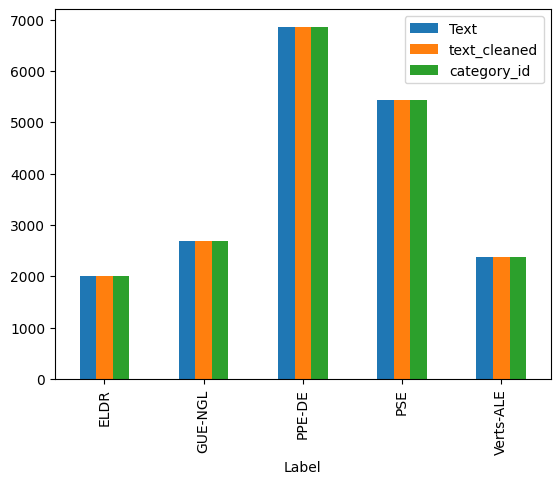

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_train.groupby('Label').count().plot.bar(ylim=0)
plt.show()

## SVM Classifier

In [12]:


X_train = features_train
Y_train = labels_train
X_test =features_test
Y_test=labels_test



/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

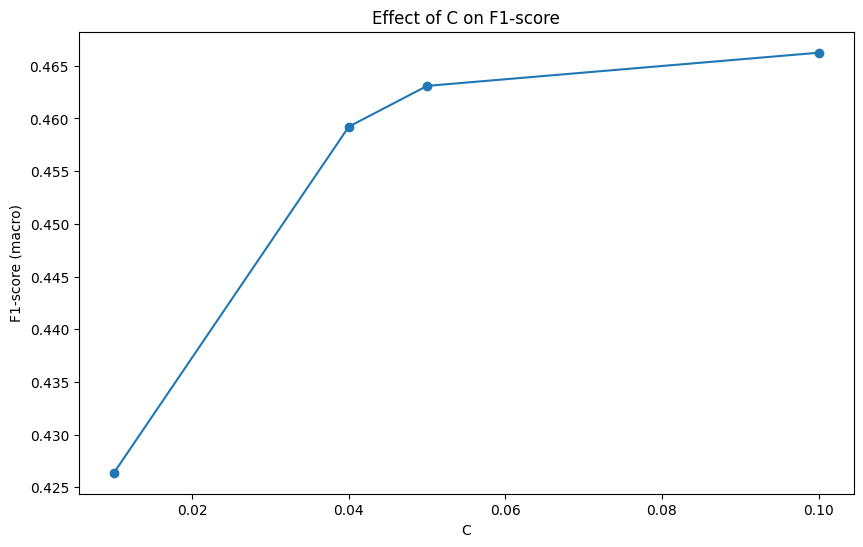

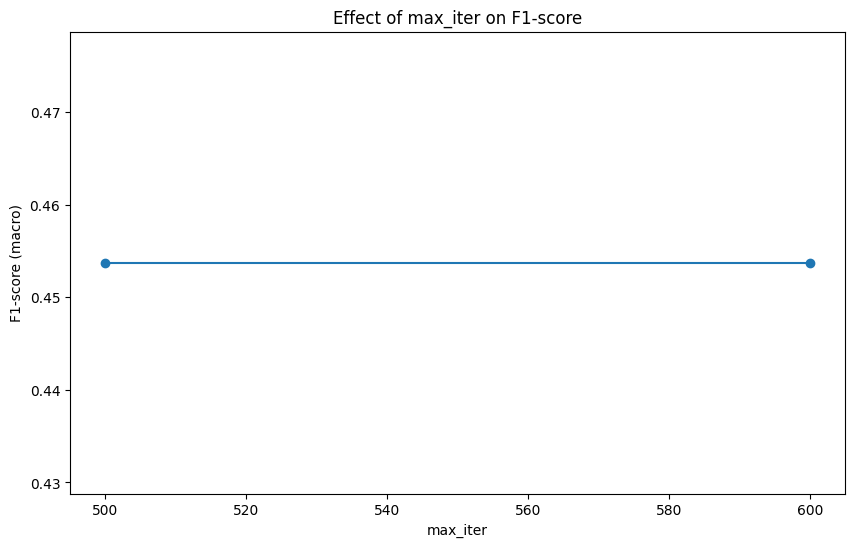

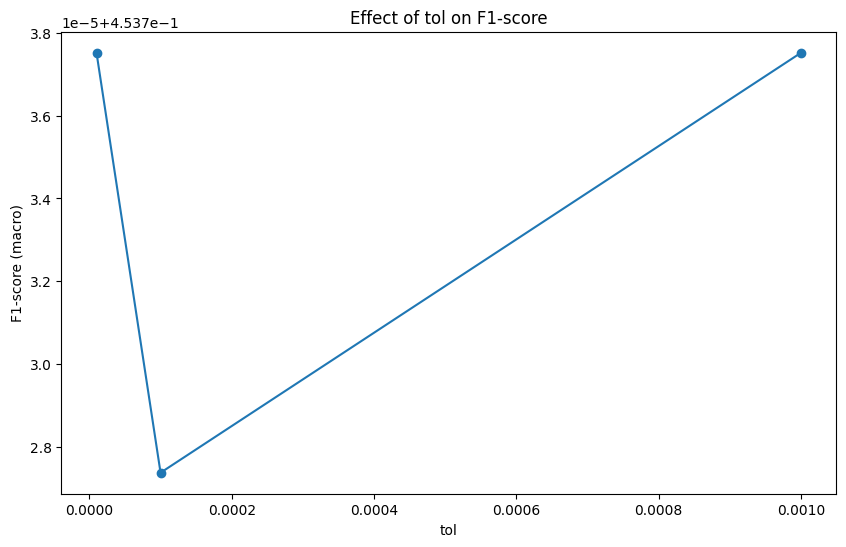

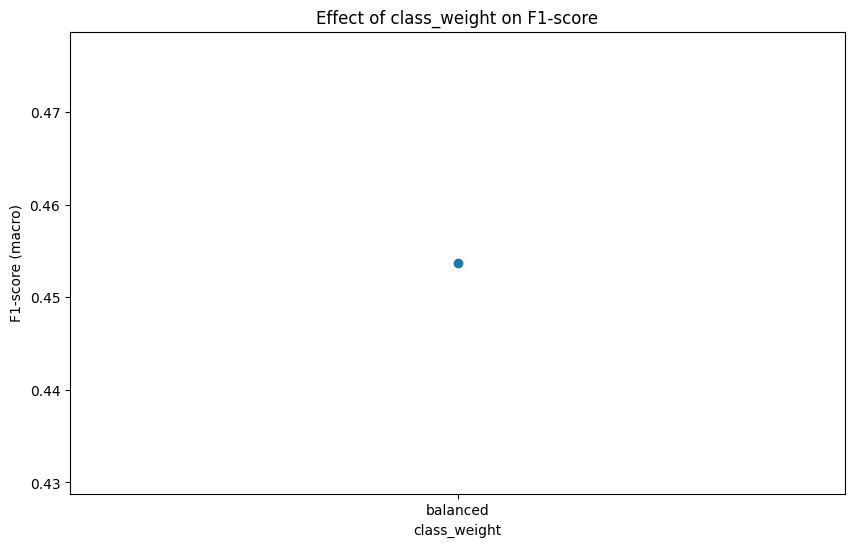

F1 Score on Test Set: 0.6059270653037078
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.60      0.56      1339
           1       0.63      0.76      0.68      1792
           2       0.68      0.65      0.66      4570
           3       0.64      0.51      0.56      3627
           4       0.51      0.61      0.55      1585

    accuracy                           0.62     12913
   macro avg       0.59      0.63      0.61     12913
weighted avg       0.62      0.62      0.62     12913

Confusion Matrix:
[[ 810   68  226  128  107]
 [  73 1356  138  139   86]
 [ 299  305 2983  620  363]
 [ 271  304  835 1845  372]
 [  90  135  226  173  961]]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

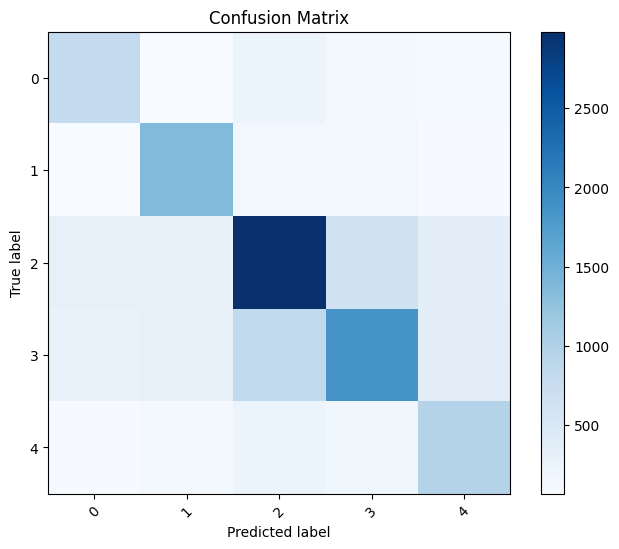

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, make_scorer, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix


# définir Grid
param_grid = {
    'C': [0.01,0.04,0.05,0.1,],
    'max_iter': [500,600],
    'tol': [1e-5,1e-4,1e-3],
    'class_weight': ['balanced']
}

# LinearSVC 
svm = LinearSVC(random_state=0)


f1_scorer = make_scorer(f1_score, average='macro')

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring=f1_scorer, verbose=1)

# train modèle
grid_search.fit(X_train, Y_train)

# déssiner le figure F-score de chaque paramètre
for parameter, values in param_grid.items():
   
    if parameter != 'class_weight':
        values = sorted(values)
    scores = []
    for value in values:
        indices = [i for i, param in enumerate(grid_search.cv_results_['params']) if param[parameter] == value]
        if indices:
            scores.append(np.mean([grid_search.cv_results_['mean_test_score'][i] for i in indices]))
        else:
            scores.append(None)
    ...
    if scores:  
        plt.figure(figsize=(10, 6))

        plt.figure(figsize=(10, 6))
        
        valid_scores = [(v, s) for v, s in zip(values, scores) if s is not None]
        if valid_scores:  
            valid_values, valid_scores = zip(*valid_scores)
            plt.plot(valid_values, valid_scores, marker='o')
            plt.title(f'Effect of {parameter} on F1-score')
            plt.xlabel(parameter)
            plt.ylabel('F1-score (macro)')
            plt.show()

# utiliser le meilleur paramètre sur test data
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)
f1_test_score = f1_score(Y_test, Y_pred, average='macro')
print("F1 Score on Test Set:", f1_test_score)


print("Classification Report:\n", classification_report(Y_test, Y_pred))

conf_matrix = confusion_matrix(Y_test, Y_pred)


print("Confusion Matrix:")
print(conf_matrix)
classes = np.unique(Y_test)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(np.arange(len(classes)), classes, rotation=45)
plt.yticks(np.arange(len(classes)), classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
